# Created By CapTech

1. Nina Ayuningtyas
2. Daniel Stephanus Najoan
3. Ghazali Akmal Rabbani

In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


# Import Library and Data

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_xlsx = pd.read_excel("Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name="Data Jakarta")

# Data Preprocessing

In [4]:
#Slicing to get necessary column only
data_slice = data_xlsx.iloc[:,:17]

In [5]:
#Drop column 'Belum Diketahui (Masih verifikasi)', because in that column is full of null value
data = data_slice.drop(['Belum Diketahui (masih verifikasi)'], axis = 1)

In [6]:
#Check Null Value for other column
data.isnull().sum()

Tanggal                          0
Jam                             19
Tanggal Jam                      0
Total Pasien                     0
Sembuh                           0
Meninggal                        0
Self Isolation                   0
Masih Perawatan                  0
Menunggu Hasil                 496
Tenaga Kesehatan Terinfeksi    496
Positif Harian                   0
Positif Aktif                    0
Sembuh Harian                    0
Tanpa Gejala                   140
Bergejala                      140
Belum Ada Data                 140
dtype: int64

In [7]:
#Fill null value in Jam column with 18 which means as 18.00 or 6pm
data['Jam'] = data['Jam'].fillna(18)

In [8]:
#Fill other null value data with zero (0)
data = data.fillna(0)

In [41]:
data.isnull().sum()

Tanggal                        0
Jam                            0
Tanggal Jam                    0
Total Pasien                   0
Sembuh                         0
Meninggal                      0
Self Isolation                 0
Masih Perawatan                0
Menunggu Hasil                 0
Tenaga Kesehatan Terinfeksi    0
Positif Harian                 0
Positif Aktif                  0
Sembuh Harian                  0
Tanpa Gejala                   0
Bergejala                      0
Belum Ada Data                 0
dtype: int64

In [9]:
#Show clean data
data

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,18.0,2020-03-01 18:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
1,2020-03-02,18.0,2020-03-02 18:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
2,2020-03-03,18.0,2020-03-03 18:00:00,3,0,1,0,2,0.0,0.0,3,2,0,0.0,0.0,0.0
3,2020-03-04,18.0,2020-03-04 18:00:00,3,0,1,0,2,0.0,0.0,0,2,0,0.0,0.0,0.0
4,2020-03-05,18.0,2020-03-05 18:00:00,7,0,3,0,4,0.0,0.0,4,4,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2021-07-11,8.0,2021-07-11 08:00:00,662442,564437,9395,68251,20359,0.0,0.0,13133,88610,20570,4769.0,12893.0,70948.0
498,2021-07-12,8.0,2021-07-12 08:00:00,677061,584912,9462,66581,16106,0.0,0.0,14619,82687,20475,17649.0,25597.0,39441.0
499,2021-07-13,8.0,2021-07-13 08:00:00,689243,589486,9541,71848,18368,0.0,0.0,12182,90216,4574,16957.0,22339.0,50920.0
500,2021-07-14,8.0,2021-07-14 08:00:00,701910,592556,9603,78571,21180,0.0,0.0,12667,99751,3070,32752.0,54463.0,12536.0


In [10]:
#Check Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Tanggal                      502 non-null    datetime64[ns]
 1   Jam                          502 non-null    float64       
 2   Tanggal Jam                  502 non-null    datetime64[ns]
 3   Total Pasien                 502 non-null    int64         
 4   Sembuh                       502 non-null    int64         
 5   Meninggal                    502 non-null    int64         
 6   Self Isolation               502 non-null    int64         
 7   Masih Perawatan              502 non-null    int64         
 8   Menunggu Hasil               502 non-null    float64       
 9   Tenaga Kesehatan Terinfeksi  502 non-null    float64       
 10  Positif Harian               502 non-null    int64         
 11  Positif Aktif                502 non-null    

# Positif Harian Mean

In [11]:
data["Positif Harian"].mean()

1423.5079681274901

# Positif Harian median

In [12]:
data["Positif Harian"].median()

889.0

# Convert Positif Harian Column to string type to get mode value of the column

In [13]:
categorical_positif_harian = data["Positif Harian"].astype(str)

# Get Mode value of Positif Harian Column

In [14]:
categorical_positif_harian.describe()

count     502
unique    436
top         0
freq        7
Name: Positif Harian, dtype: object

In [15]:
categorical_positif_harian.mode()

0    0
dtype: object

**Based on result in above, Mode value of Positif Harian column is Zero (0) with frequency of Zero data is 7**

# Get Positif Harian Min

In [16]:
data["Positif Harian"].min()

0

# Get Positif Harian Max

In [17]:
data["Positif Harian"].max()

14619

In [37]:
data['Positif Harian'].describe()

count      502.000000
mean      1423.507968
std       2193.364567
min          0.000000
25%        217.000000
50%        889.000000
75%       1443.750000
max      14619.000000
Name: Positif Harian, dtype: float64

In [44]:
data[data['Positif Harian'] == 14619]

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
498,2021-07-12,8.0,2021-07-12 08:00:00,677061,584912,9462,66581,16106,0.0,0.0,14619,82687,20475,17649.0,25597.0,39441.0


In [45]:
data[data['Positif Harian'] == 0]

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,18.0,2020-03-01 18:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
1,2020-03-02,18.0,2020-03-02 18:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
3,2020-03-04,18.0,2020-03-04 18:00:00,3,0,1,0,2,0.0,0.0,0,2,0,0.0,0.0,0.0
5,2020-03-06,18.0,2020-03-06 18:00:00,7,0,3,0,4,0.0,0.0,0,4,0,0.0,0.0,0.0
6,2020-03-07,18.0,2020-03-07 18:00:00,7,0,3,0,4,0.0,0.0,0,4,0,0.0,0.0,0.0
7,2020-03-08,18.0,2020-03-08 18:00:00,7,0,3,0,4,0.0,0.0,0,4,0,0.0,0.0,0.0
9,2020-03-10,18.0,2020-03-10 18:00:00,34,0,3,0,31,0.0,0.0,0,31,0,0.0,0.0,0.0


# Get Outlier of each Column

In [18]:
#Get list of int column data
data_col_numeric = data.select_dtypes(include=['int64']).columns.tolist()
data_col_numeric

['Total Pasien',
 'Sembuh',
 'Meninggal',
 'Self Isolation',
 'Masih Perawatan',
 'Positif Harian',
 'Positif Aktif',
 'Sembuh Harian']

In [19]:
#Get list of float column data
data_col_float = data.select_dtypes(include=['float64']).columns.tolist()
data_col_float

['Jam',
 'Menunggu Hasil',
 'Tenaga Kesehatan Terinfeksi',
 'Tanpa Gejala',
 'Bergejala',
 'Belum Ada Data']

In [20]:
#Create Boxplot Function

def boxplot_numerical(numerical):
    plt.figure(figsize = (10, 6))
    sns.boxplot(data[numerical]).set_title(numerical)
    median = data[numerical].median()
    FirstQuartile = data[numerical].quantile(0.25)
    ThirdQuartile = data[numerical].quantile(0.75)
    Interquartile = scipy.stats.iqr(data[numerical])
    UpperFence = ThirdQuartile + (1.5*Interquartile)
    LowerFence = FirstQuartile - (1.5*Interquartile)

    print ('==================================')
    print ('Statistical Data Summary')
    print ('==================================')
    print ('Median : ', median)
    print ('1st Quartile : ', FirstQuartile)
    print ('3rd Quartile : ', ThirdQuartile)
    print ('IQR : ', Interquartile)
    print ('Upper Fence : ', UpperFence)
    print ('Lower Fence : ', LowerFence)
    print ('==================================')

    UpperOutliers = []
    LowerOutliers = []
    StatusUpperOutliers = False
    StatusLowerOutliers = False
    for x in data[numerical]:
      if (x > UpperFence):
        UpperOutliers.append(x)
        StatusUpperOutliers = True
      elif (x < LowerFence):
        LowerOutliers.append(x)
        StatusLowerOutliers = True
    print ()
    print ('==================================')
    print ('Outliers Data Detection')
    print ('==================================')
    print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
    print ('Upper Outliers Status : ', StatusUpperOutliers)
    print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
    print ('Lower Outliers Status : ', StatusLowerOutliers)

    plt.figure(figsize = (10, 6))
    sns.boxplot(data[numerical], showfliers = False).set_title(numerical + ' No Outliers')

## Outlier of Each Column

Statistical Data Summary
Median :  110642.0
1st Quartile :  12103.0
3rd Quartile :  357273.75
IQR :  345170.75
Upper Fence :  875029.875
Lower Fence :  -505653.125

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


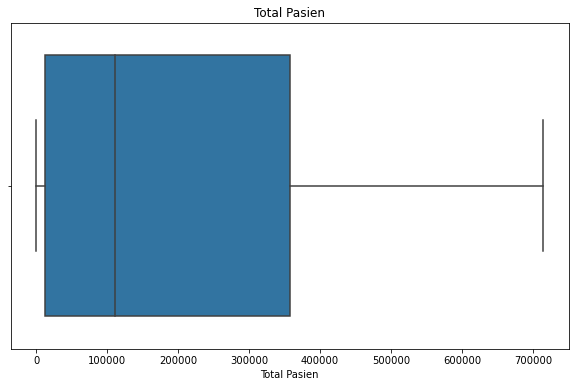

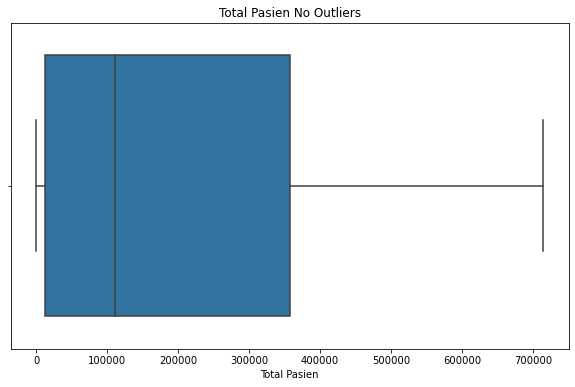

In [21]:
boxplot_numerical(data_col_numeric[0])

Statistical Data Summary
Median :  100323.0
1st Quartile :  7448.5
3rd Quartile :  343089.75
IQR :  335641.25
Upper Fence :  846551.625
Lower Fence :  -496013.375

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


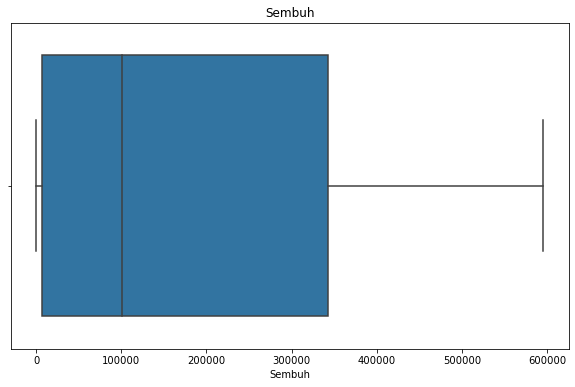

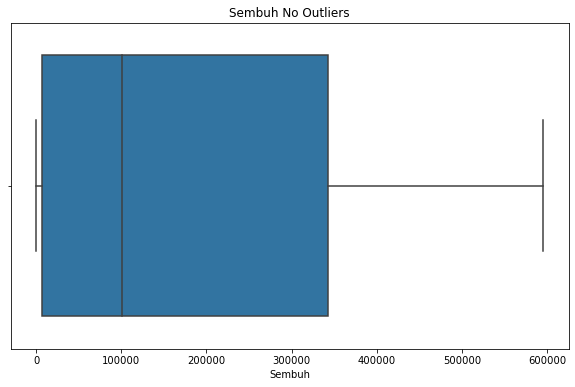

In [22]:
boxplot_numerical(data_col_numeric[1])

Statistical Data Summary
Median :  2353.5
1st Quartile :  652.0
3rd Quartile :  5962.5
IQR :  5310.5
Upper Fence :  13928.25
Lower Fence :  -7313.75

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


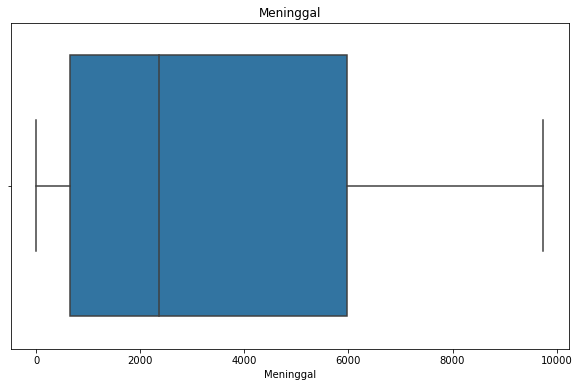

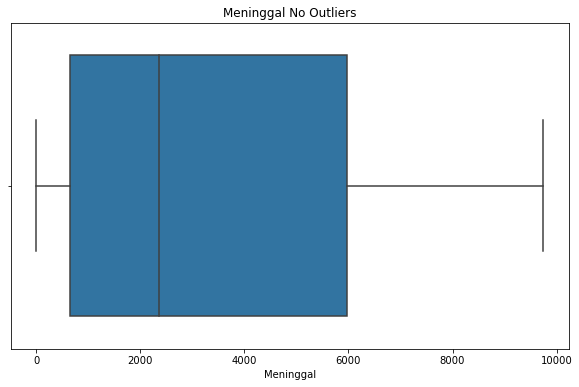

In [23]:
boxplot_numerical(data_col_numeric[2])

Statistical Data Summary
Median :  5022.5
1st Quartile :  3006.25
3rd Quartile :  8985.5
IQR :  5979.25
Upper Fence :  17954.375
Lower Fence :  -5962.625

Outliers Data Detection
Upper Outliers Data :  [17958, 18174, 18473, 18528, 18657, 18925, 19105, 19272, 19325, 19381, 19432, 19554, 19824, 19869, 20419, 20539, 20717, 21167, 21191, 21863, 22868, 26403, 29325, 33829, 38464, 42252, 45504, 47829, 49836, 53014, 54941, 59307, 62873, 65448, 66581, 68251, 69644, 71812, 71848, 72361, 73239, 78571, 86298]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


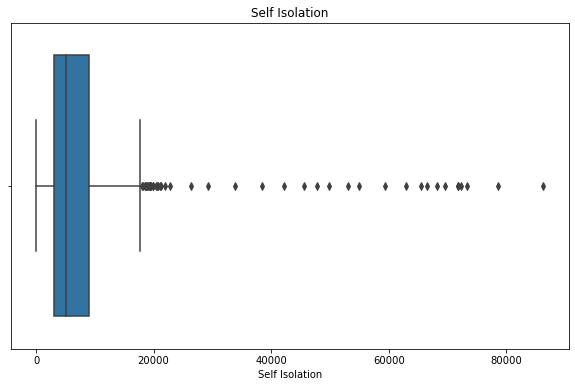

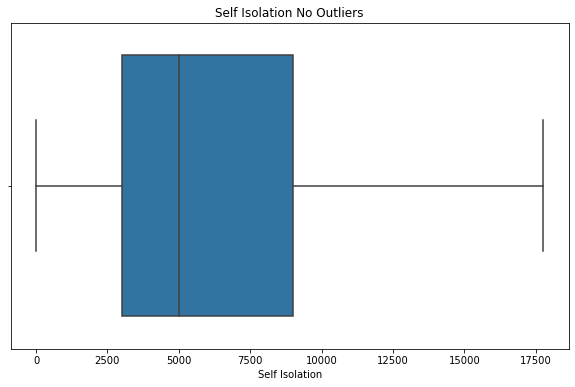

In [24]:
boxplot_numerical(data_col_numeric[3])

Statistical Data Summary
Median :  2850.0
1st Quartile :  1869.5
3rd Quartile :  4403.0
IQR :  2533.5
Upper Fence :  8203.25
Lower Fence :  -1930.75

Outliers Data Detection
Upper Outliers Data :  [8540, 8756, 9284, 9374, 9560, 9888, 10325, 11024, 11037, 11343, 12837, 14234, 15606, 16106, 17605, 18368, 18831, 19874, 20359, 20419, 21180, 22210, 22978, 24184, 24273, 25380, 26903, 27442, 27687, 28290, 29136, 29721, 30418]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


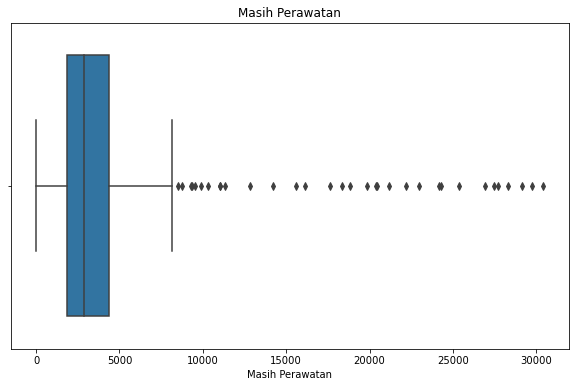

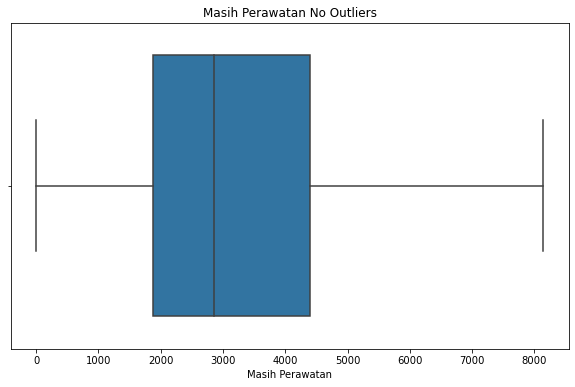

In [25]:
boxplot_numerical(data_col_numeric[4])

Statistical Data Summary
Median :  889.0
1st Quartile :  217.0
3rd Quartile :  1443.75
IQR :  1226.75
Upper Fence :  3283.875
Lower Fence :  -1623.125

Outliers Data Detection
Upper Outliers Data :  [3285, 3309, 3340, 3362, 3395, 3437, 3448, 3474, 3476, 3491, 3512, 3536, 3567, 3614, 3632, 3786, 3792, 3810, 4144, 4213, 4693, 4737, 4895, 5014, 5582, 6934, 7379, 7505, 7541, 7680, 8348, 9271, 9366, 9394, 9399, 9439, 9702, 10485, 10903, 12182, 12667, 12691, 12920, 12974, 13112, 13133, 14619]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


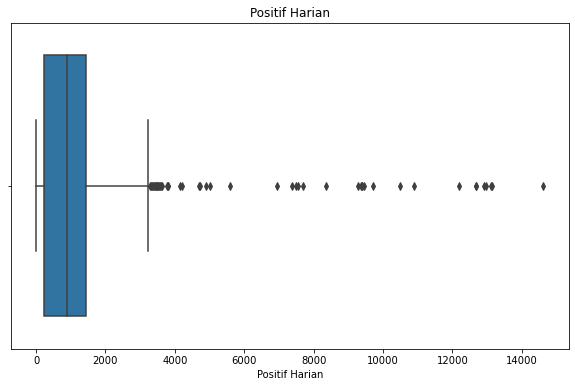

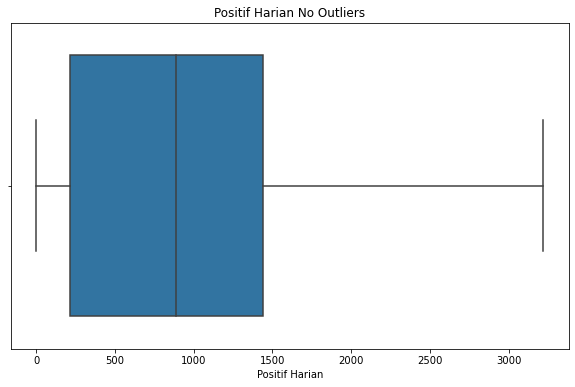

In [26]:
boxplot_numerical(data_col_numeric[5])

Statistical Data Summary
Median :  7806.0
1st Quartile :  4507.5
3rd Quartile :  12926.5
IQR :  8419.0
Upper Fence :  25555.0
Lower Fence :  -8121.0

Outliers Data Detection
Upper Outliers Data :  [26029, 26031, 27112, 30142, 32060, 32191, 35705, 40637, 44931, 51434, 57295, 62126, 65923, 70039, 74020, 78394, 82383, 82687, 86994, 88610, 90216, 91163, 94584, 96085, 99751, 100062, 100142, 102082, 109276]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


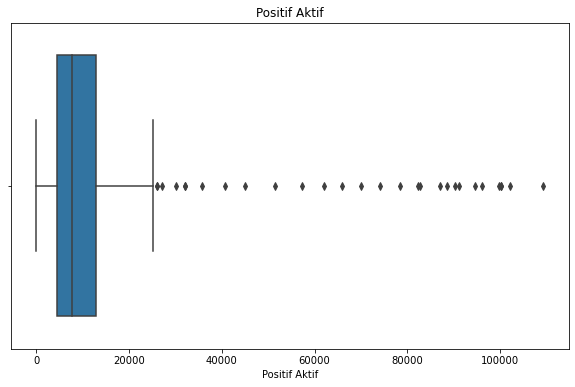

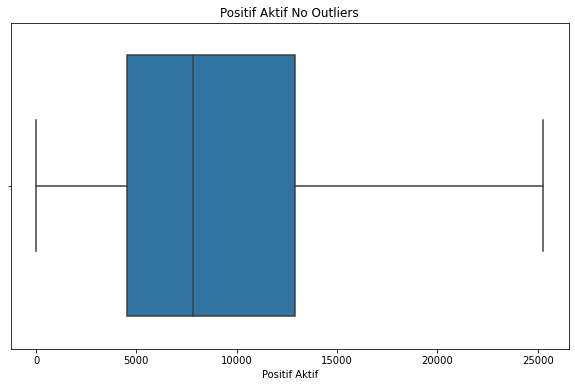

In [27]:
boxplot_numerical(data_col_numeric[6])

Statistical Data Summary
Median :  858.0
1st Quartile :  161.0
3rd Quartile :  1310.75
IQR :  1149.75
Upper Fence :  3035.375
Lower Fence :  -1563.625

Outliers Data Detection
Upper Outliers Data :  [3052, 3070, 3244, 3255, 3416, 3438, 3484, 3504, 3504, 3518, 3568, 3674, 3707, 3771, 4005, 4313, 4325, 4342, 4345, 4349, 4527, 4574, 4610, 5006, 5683, 5757, 5799, 5936, 6607, 10886, 14856, 16926, 20475, 20570]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


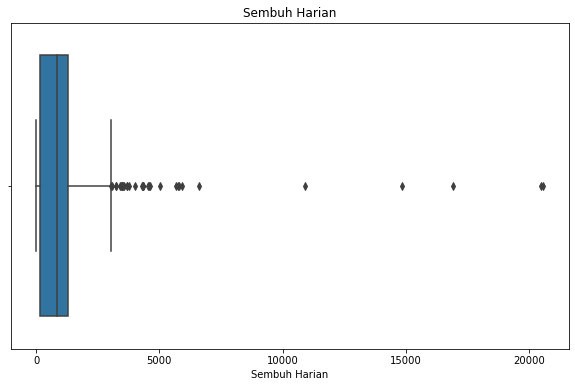

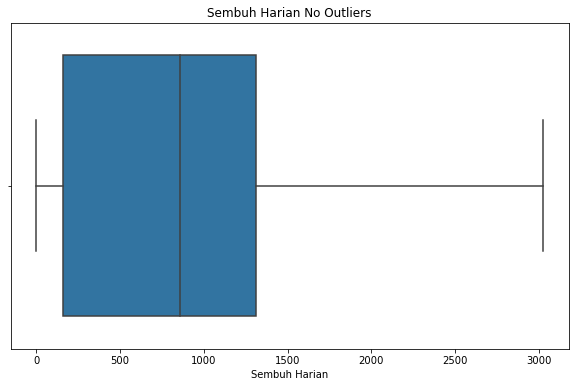

In [28]:
boxplot_numerical(data_col_numeric[7])

Statistical Data Summary
Median :  8.0
1st Quartile :  8.0
3rd Quartile :  8.0
IQR :  0.0
Upper Fence :  8.0
Lower Fence :  8.0

Outliers Data Detection
Upper Outliers Data :  [18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


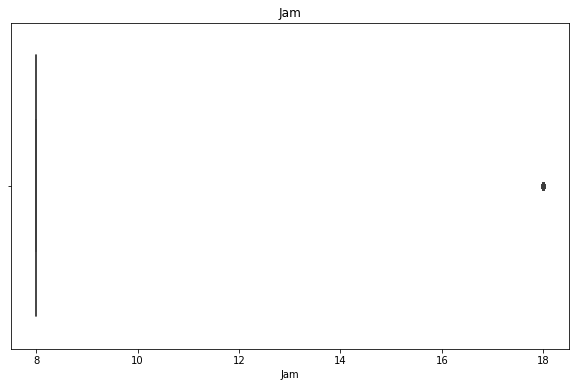

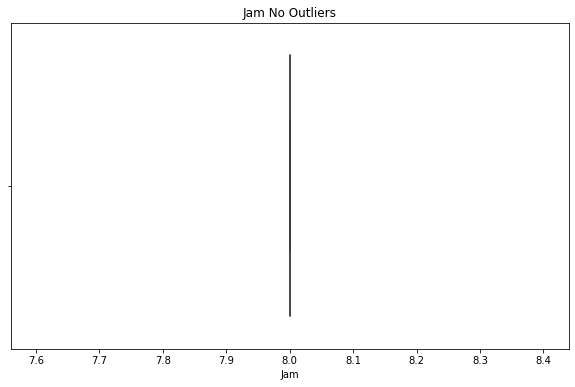

In [29]:
boxplot_numerical(data_col_float[0])

Statistical Data Summary
Median :  0.0
1st Quartile :  0.0
3rd Quartile :  0.0
IQR :  0.0
Upper Fence :  0.0
Lower Fence :  0.0

Outliers Data Detection
Upper Outliers Data :  [345.0, 375.0, 393.0, 431.0, 445.0, 479.0]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


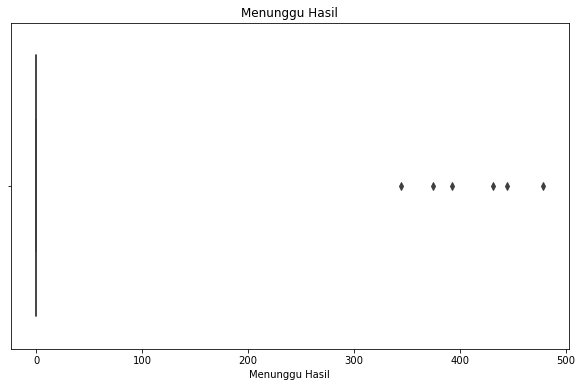

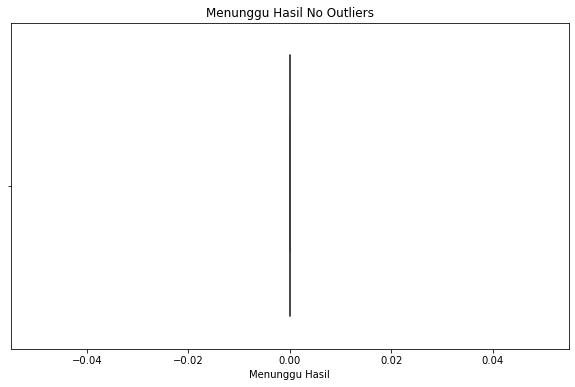

In [30]:
boxplot_numerical(data_col_float[1])

Statistical Data Summary
Median :  0.0
1st Quartile :  0.0
3rd Quartile :  0.0
IQR :  0.0
Upper Fence :  0.0
Lower Fence :  0.0

Outliers Data Detection
Upper Outliers Data :  [25.0, 28.0, 37.0, 42.0, 44.0, 47.0]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


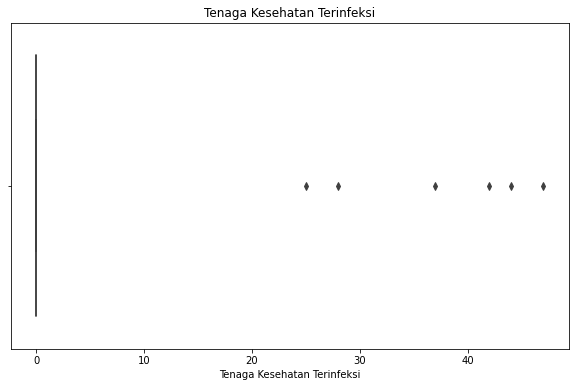

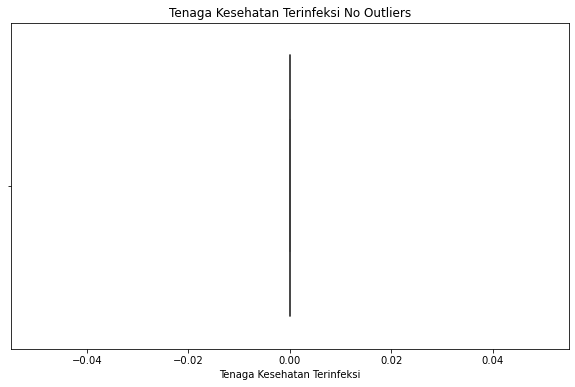

In [31]:
boxplot_numerical(data_col_float[2])

Statistical Data Summary
Median :  2133.0
1st Quartile :  0.0
3rd Quartile :  6705.0
IQR :  6705.0
Upper Fence :  16762.5
Lower Fence :  -10057.5

Outliers Data Detection
Upper Outliers Data :  [16820.0, 16957.0, 17099.0, 17144.0, 17300.0, 17500.0, 17649.0, 18100.0, 18376.0, 18399.0, 18451.0, 18688.0, 18788.0, 19088.0, 19308.0, 20500.0, 20500.0, 20500.0, 20991.0, 21491.0, 23553.0, 23953.0, 24507.0, 25000.0, 25600.0, 26005.0, 26005.0, 27502.0, 28502.0, 28902.0, 29253.0, 29553.0, 31922.0, 32752.0]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


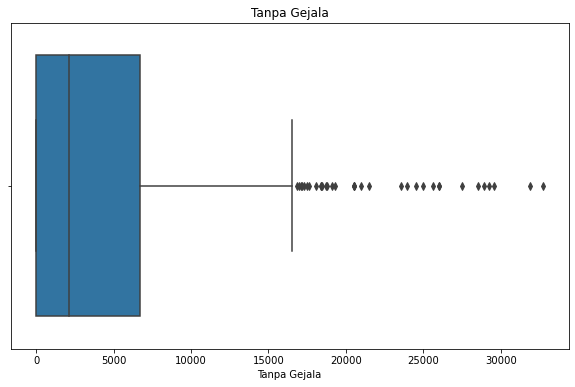

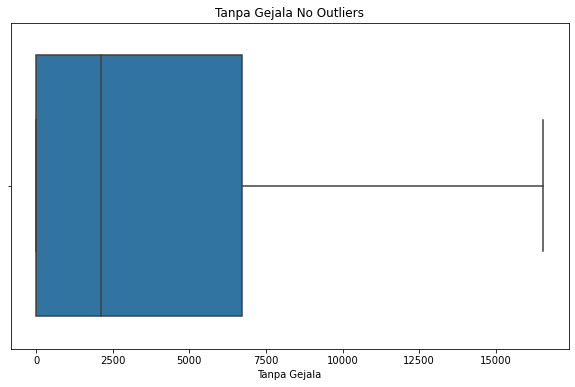

In [32]:
boxplot_numerical(data_col_float[3])

Statistical Data Summary
Median :  4749.0
1st Quartile :  0.0
3rd Quartile :  7692.0
IQR :  7692.0
Upper Fence :  19230.0
Lower Fence :  -11538.0

Outliers Data Detection
Upper Outliers Data :  [19670.0, 19733.0, 20096.0, 20101.0, 21941.0, 22339.0, 25076.0, 25597.0, 26151.0, 26379.0, 27514.0, 28925.0, 29461.0, 40727.0, 50824.0, 52360.0, 54463.0, 57521.0, 60476.0]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


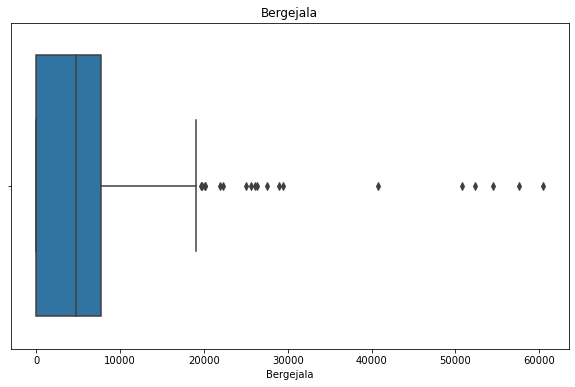

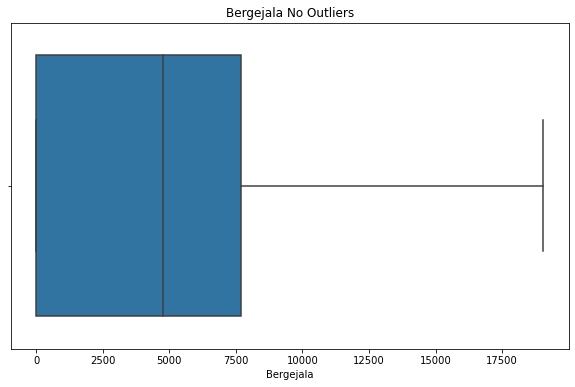

In [33]:
boxplot_numerical(data_col_float[4])

Statistical Data Summary
Median :  1133.0
1st Quartile :  0.0
3rd Quartile :  3137.5
IQR :  3137.5
Upper Fence :  7843.75
Lower Fence :  -4706.25

Outliers Data Detection
Upper Outliers Data :  [7894.0, 7928.0, 7940.0, 7944.0, 8565.0, 8723.0, 8748.0, 9217.0, 9599.0, 9975.0, 10760.0, 11296.0, 11325.0, 12536.0, 13636.0, 15521.0, 15532.0, 15657.0, 19446.0, 20083.0, 21292.0, 24165.0, 24994.0, 25093.0, 27585.0, 32506.0, 33967.0, 36510.0, 39441.0, 40022.0, 41215.0, 49132.0, 49320.0, 50920.0, 58094.0, 61707.0, 63469.0, 70948.0]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


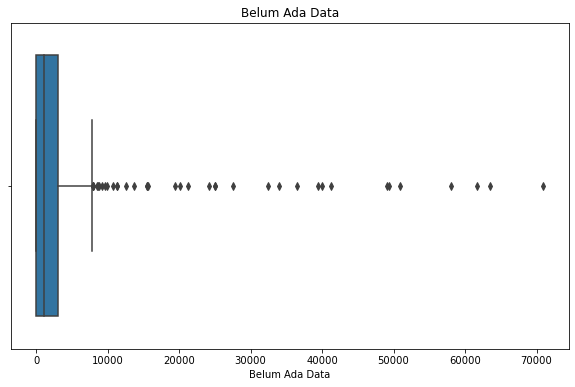

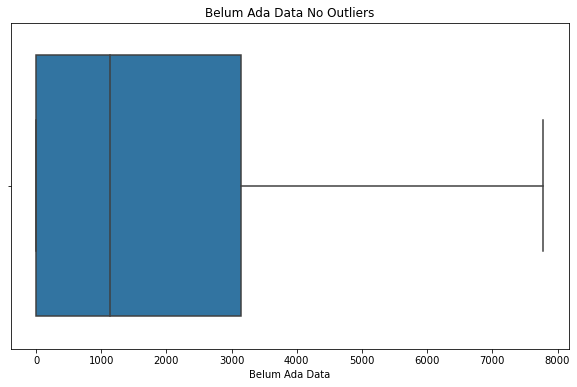

In [34]:
boxplot_numerical(data_col_float[5])

# Correlation Heatmap

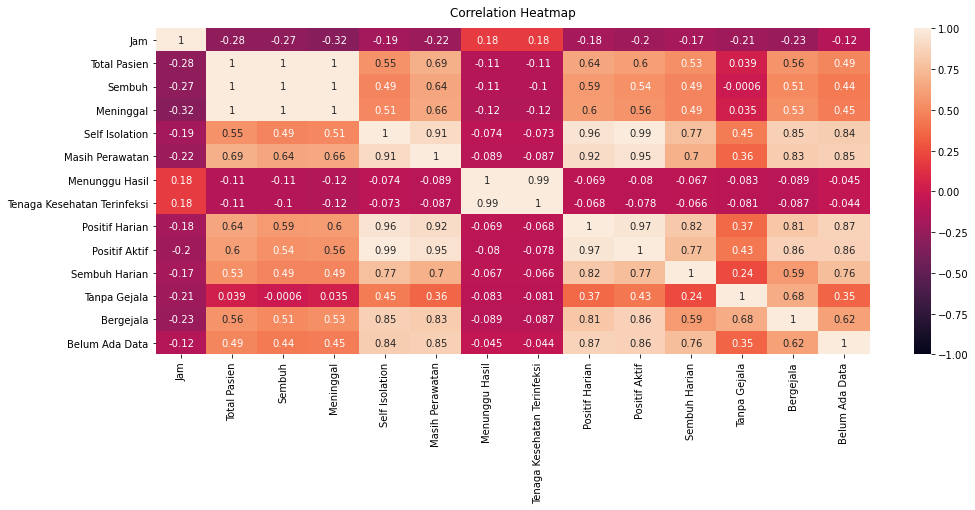

In [35]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Convert Final Data to New CSV

In [38]:
data.to_csv('DataJakarta_COVID19_DataClean.csv', index=False)

In [39]:
test = pd.read_csv('DataJakarta_COVID19_DataClean.csv')
test

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01 00:00:00,18.0,2020-03-01 18:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
1,2020-03-02 00:00:00,18.0,2020-03-02 18:00:00,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0
2,2020-03-03 00:00:00,18.0,2020-03-03 18:00:00,3,0,1,0,2,0.0,0.0,3,2,0,0.0,0.0,0.0
3,2020-03-04 00:00:00,18.0,2020-03-04 18:00:00,3,0,1,0,2,0.0,0.0,0,2,0,0.0,0.0,0.0
4,2020-03-05 00:00:00,18.0,2020-03-05 18:00:00,7,0,3,0,4,0.0,0.0,4,4,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2021-07-11 00:00:00,8.0,2021-07-11 08:00:00,662442,564437,9395,68251,20359,0.0,0.0,13133,88610,20570,4769.0,12893.0,70948.0
498,2021-07-12 00:00:00,8.0,2021-07-12 08:00:00,677061,584912,9462,66581,16106,0.0,0.0,14619,82687,20475,17649.0,25597.0,39441.0
499,2021-07-13 00:00:00,8.0,2021-07-13 08:00:00,689243,589486,9541,71848,18368,0.0,0.0,12182,90216,4574,16957.0,22339.0,50920.0
500,2021-07-14 00:00:00,8.0,2021-07-14 08:00:00,701910,592556,9603,78571,21180,0.0,0.0,12667,99751,3070,32752.0,54463.0,12536.0


In [40]:
test.isnull().sum()

Tanggal                        0
Jam                            0
Tanggal Jam                    0
Total Pasien                   0
Sembuh                         0
Meninggal                      0
Self Isolation                 0
Masih Perawatan                0
Menunggu Hasil                 0
Tenaga Kesehatan Terinfeksi    0
Positif Harian                 0
Positif Aktif                  0
Sembuh Harian                  0
Tanpa Gejala                   0
Bergejala                      0
Belum Ada Data                 0
dtype: int64